In [10]:
### Code to read in h5 files as detailed in the first guidebook
# Import necessary packages
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.io import loadmat
import datetime as dt

In [11]:
deployment_num = 1
sensor_id = "E1_103071"
# directory_initial_user_path = r"/Volumes/BOEM/"  # Katherine
# directory_initial_user_path = r"/Volumes/kanarde/BOEM/"  # Brooke
directory_initial_user_path = r"Z:/"  # Levi

In [12]:
filepath = os.path.join(
    directory_initial_user_path,
    f"deployment_{deployment_num}/BulkStats/",
    f"{sensor_id}",
)
waves = {}
file_path = os.path.join(filepath, "Echo1avg")  # file path
file_path2 = os.path.join(filepath, "SedTime")  # file path
df = pd.read_hdf(file_path)  # read the file into a Pandas Dataframe
df2 = pd.read_hdf(file_path2)  # read the file into a Pandas Dataframe
waves["Echo1avg"] = df
waves["SedTime"] = df2

In [ ]:
from spectral_sediment import calculate_sed_stats

dtens = 50400
seddddy = calculate_sed_stats(
    waves,
    event_time=dt.datetime(2024, 9, 8, 20, 00),
    end_time=dt.datetime(2024, 9, 19, 12, 00),
    fs=2,
    dtburst=86400 * 7,
    overlap=0.3,
    dtens=86400*7,
    mode="multitaper",
)

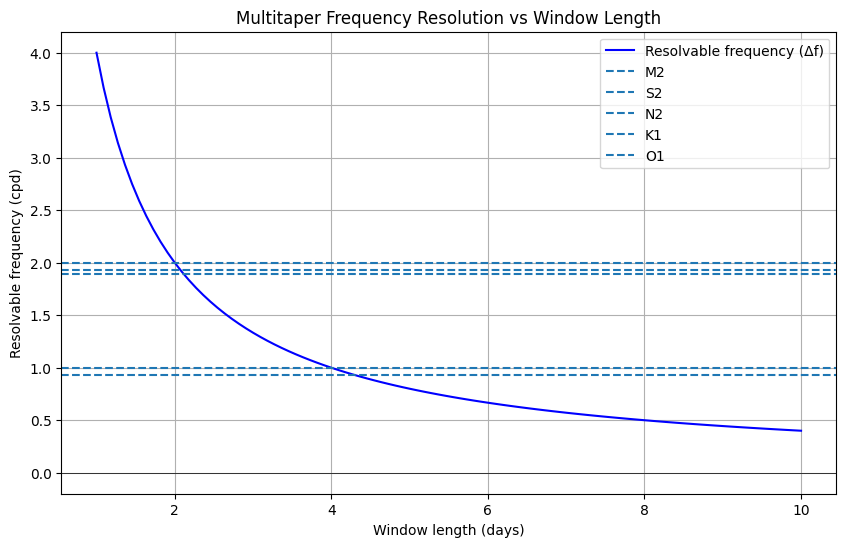

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
NW = 4
window_days = np.linspace(1, 10, 100)  # window lengths from 1 to 10 days
window_sec = window_days * 24 * 3600

# Frequency resolution formula
delta_f_hz = NW / window_sec
delta_f_cpd = delta_f_hz * 86400  # convert Hz to cycles/day

# Tidal constituents in cpd
tidal_freqs = {'M2': 1.932, 'S2': 2.0, 'N2': 1.895, 'K1': 0.997, 'O1': 0.929}

# Plot
plt.figure(figsize=(10,6))
plt.plot(window_days, delta_f_cpd, label='Resolvable frequency (Δf)', color='blue')
plt.axhline(0, color='black', linewidth=0.5)

# Mark tidal frequencies
for name, f in tidal_freqs.items():
    plt.axhline(f, linestyle='--', label=name)

plt.xlabel('Window length (days)')
plt.ylabel('Resolvable frequency (cpd)')
plt.title('Multitaper Frequency Resolution vs Window Length')
plt.legend()
plt.grid(True)
plt.show()


(287, 7)


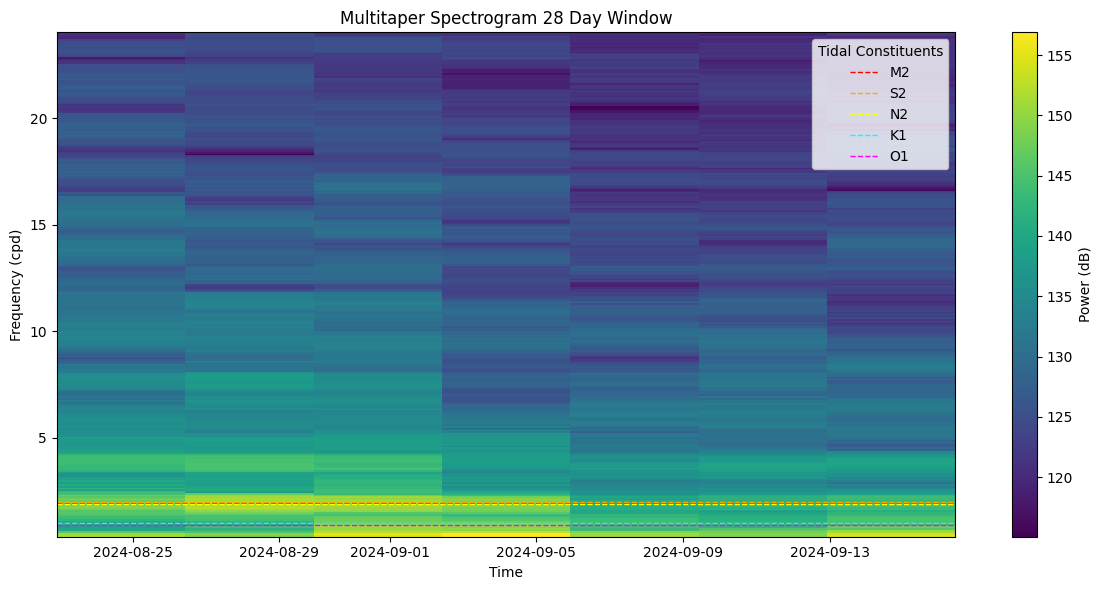

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure start_time is a pandas Timestamp
start_time = waves["SedTime"].iloc[0]  # already pd.Timestamp

# Flatten Multi_time to 1D
time_sec = np.ravel(seddddy["Multi_time"])

# Define tidal frequencies in cycles/day (cpd)
tidal_periods_hours = {
    'M2': 12.42,
    'S2': 12.00,
    'N2': 12.66,
    'K1': 23.93,
    'O1': 25.82
}
# Assign a color for each tidal constituent
colors = {
    'M2': 'red',
    'S2': 'orange',
    'N2': 'yellow',
    'K1': 'cyan',
    'O1': 'magenta'
}

tidal_freqs_cpd = {name: 24 / period for name, period in tidal_periods_hours.items()}

# Add timedelta to the timestamp
time_dt = start_time[0] + pd.to_timedelta(time_sec, unit="s")

# Convert PSD to dB
Z = seddddy["Multi_psd"]
print(Z.shape)
# Set color limits
# vmax = np.nanpercentile(Z, 99)
# vmin = np.nanpercentile(Z, 5)
freq_cpd = seddddy["Multi_freq"] * 86400  # 1 Hz = 86400 cpd

T, F = np.meshgrid(time_dt, freq_cpd)

plt.figure(figsize=(12, 6))
pcm = plt.pcolormesh(T, F, Z, shading="auto")
plt.colorbar(pcm, label="Power (dB)")

plt.xlabel("Time")
plt.ylabel("Frequency (cpd)")
plt.title("Multitaper Spectrogram 28 Day Window")

# Plot tidal lines with legend
for name, f in tidal_freqs_cpd.items():
    plt.axhline(y=f, color=colors[name], linestyle="--", linewidth=1, label=name)

plt.legend(title="Tidal Constituents", loc="upper right")
plt.tight_layout()
plt.show()


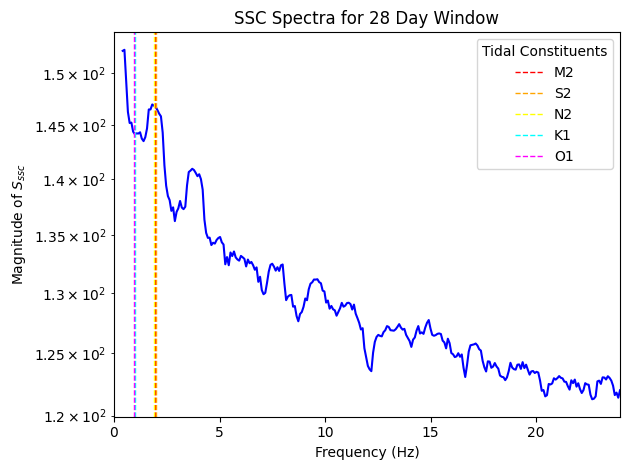

In [71]:
###This code will plot the power spectra agaisnt frequencies
plt.semilogy(
    freq_cpd, np.mean(seddddy["Multi_psd"], axis = 1), color="blue", label = "_nolegend_"
)

plt.title("SSC Spectra for 28 Day Window")
plt.ylabel("Magnitude of $S_{ssc}$")
plt.xlabel("Frequency (Hz)")
plt.xlim(0, freq_cpd.max())
plt.tight_layout()
for name, f in tidal_freqs_cpd.items():
    plt.axvline(x=f, color=colors[name], linestyle="--", linewidth=1, label=name)
plt.legend(title="Tidal Constituents", loc="upper right")
plt.tight_layout()
plt.show()
